In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [36]:
xs,target = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
xs_df = pd.DataFrame(xs)
target_df = pd.DataFrame(target, columns=['target'])

data = pd.concat([xs_df, target_df], axis=1)
data.head()



,0,1,2,3,target
0,-1.668532,-1.299013,0.274647,-0.603620,0
1,-2.972883,-1.088783,0.708860,0.422819,0
2,-0.596141,-1.370070,-3.116857,0.644452,0
3,-1.068947,-1.175057,-1.913743,0.663562,0
4,-1.305269,-0.965926,-0.154072,1.193612,0


In [37]:
x = data.iloc[: ,:-1].values
y = data.iloc[:,-1].values

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_norm = sc.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm ,y , test_size=0.2 , random_state=0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [41]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)

0.96

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(rf.feature_importances_)

[[ 79   3]
 [  5 113]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        82
           1       0.97      0.96      0.97       118

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

[0.08841577 0.84084386 0.03339229 0.03734808]


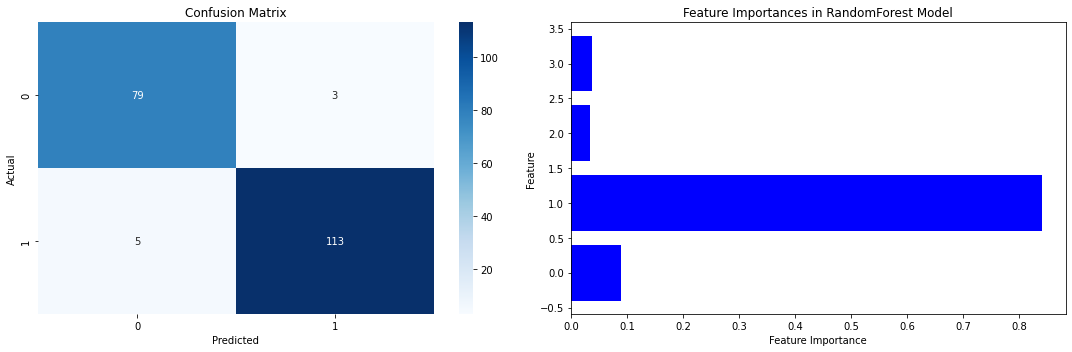

In [58]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
fig , ax = plt.subplots(1,2,figsize=(15, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Plotting feature importances
importances = rf.feature_importances_
x_features = data.columns[:-1]
ax[1].barh(x_features, importances, color='b', align='center')
ax[1].set_xlabel('Feature Importance')
ax[1].set_ylabel('Feature')
ax[1].set_title('Feature Importances in RandomForest Model')

plt.tight_layout()

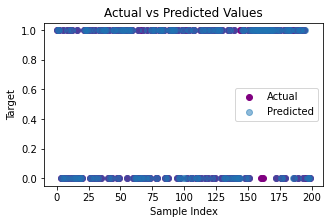

In [75]:
plt.figure(figsize=(5, 3))
plt.scatter(range(len(x_test)), y_test, color='purple', label='Actual' ,alpha = 1)
plt.scatter(range(len(x_test)), y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Target')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()